# Project Part 3: Deep Learning for The Song Popularity Score Prediction Model

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/cdinh92/CS39AA-project/blob/main/project_part3.ipynb)

Welcome to the data science project undertaken for the CS39AA NLP Machine Learning class at MSU Denver. In this exploration, the aim is to delve into the world of music industry and investigate whether a predictive model can be designed to forecast the success of songs based on the popularity scores. The focus of this analysis lies on 8 key song features: danceability, energy, mode, loudness, speechiness, instrumentalness, tempo, and valence.

**Check the Project Part 1 [here](https://github.com/cdinh92/CS39AA-Project/blob/main/project_part1.ipynb)**

**Check the Project Part 2 [here](https://github.com/cdinh92/CS39AA-Project/blob/main/project_part2.ipynb)**

## 1. Introduction

After exploring the Spotify top songs dataset by Joakim Arvidsson on [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs), I reduce it to nearly 15000 songs in the clean file named [filtered_spotify_songs.csv](https://github.com/cdinh92/CS39AA-Project/blob/main/filtered_spotify_songs.csv). In the previous phase of our project, we immersed ourselves in the intricacies of the RandomForestRegressor model, diligently fine-tuning its parameters in the quest for optimal performance. However, the persistently high Mean Squared Error has left me yearning for a more potent solution. In this conclusive chapter of our project, we pivot towards neural networks, driven by the belief that the complexity of our data demands a more intricate solution. 

**Initial Prediction:**
Early predictions lean towards **Random Forest** outperforming, especially on large datasets typical of regression problems. However, this model pose a major challenge that it can’t extrapolate outside unseen data. We’ll dive deeper into these challenge later.

**Alternative Approach:**
While recognizing the potential limitations of predictive models in capturing the entirety of a song's success factors, this project might also seeks to identify common features among trending songs, just in case the predictive results are far from expectations.

## 2. Training the predicting models

Let's explore the dataset and drop some columns

In [1]:
# import all of the python modules/packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import RobustScaler

# Check the filtered spotify songs csv file
# This block is for both local work and Github repository execute
try:
    raw_data = pd.read_csv("filtered_spotify_songs.csv")
    print("CSV file found and loaded.")
except FileNotFoundError:
    raw_data = pd.read_csv("https://raw.githubusercontent.com/cdinh92/CS39AA-Project/main/filtered_spotify_songs.csv")

# Specify the columns to keep for the training part
columns_to_keep = ['track_popularity','danceability','energy','speechiness','loudness','mode','instrumentalness','valence','tempo']

# Use loc to select only the specified columns
data = raw_data.loc[:, columns_to_keep]
data.info()

2023-12-04 22:11:23.218576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


CSV file found and loaded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14925 entries, 0 to 14924
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  14925 non-null  int64  
 1   danceability      14925 non-null  float64
 2   energy            14925 non-null  float64
 3   speechiness       14925 non-null  float64
 4   loudness          14925 non-null  float64
 5   mode              14925 non-null  int64  
 6   instrumentalness  14925 non-null  float64
 7   valence           14925 non-null  float64
 8   tempo             14925 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.0 MB


In [2]:
scaler = RobustScaler()# Create target object and call it y
y = data.track_popularity
# Create X
features = ['danceability','energy','speechiness','loudness','mode','instrumentalness','valence','tempo']
X = data[features]
data = scaler.fit_transform(data.astype(np.float64))
data = scaler.fit_transform(data.astype(np.int64))

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)
X_train.shape

(10447, 8)

In [3]:
model=Sequential() #here we get an insance of our model
model.add(Dense(8, activation="relu")) # here we add a dense layer with 8 neurons because we have 8 features
model.add(Dense(8, activation="relu")) 
model.add(Dense(8, activation="relu")) 
model.add(Dense(8, activation="relu"))
model.add(Dense(1)) # here we add the fina layer with 1 neurons because we have one output, that is the track popularity score

In [4]:
model.compile(optimizer="adam", loss="mse")

In [5]:
model.fit(x= X_train, y= y_train, batch_size=128, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
82/82 [==============================] - 2s 5ms/step - loss: 2314.8645 - val_loss: 2018.9553
Epoch 2/300
82/82 [==============================] - 0s 2ms/step - loss: 1419.5236 - val_loss: 600.0312
Epoch 3/300
82/82 [==============================] - 0s 2ms/step - loss: 558.4434 - val_loss: 554.8534
Epoch 4/300
82/82 [==============================] - 0s 3ms/step - loss: 554.0441 - val_loss: 552.2589
Epoch 5/300
82/82 [==============================] - 0s 2ms/step - loss: 549.6243 - val_loss: 549.4354
Epoch 6/300
82/82 [==============================] - 0s 2ms/step - loss: 545.9835 - val_loss: 542.6533
Epoch 7/300
82/82 [==============================] - 0s 2ms/step - loss: 536.5457 - val_loss: 529.3109
Epoch 8/300
82/82 [==============================] - 0s 2ms/step - loss: 527.6254 - val_loss: 520.4816
Epoch 9/300
82/82 [==============================] - 0s 3ms/step - loss: 519.9463 - val_loss: 514.2170
Epoch 10/300
82/82 [==============================] - 0s 2ms/step - lo

In [6]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,2314.864502,2018.955322
1,1419.523560,600.031250
2,558.443359,554.853394
3,554.044128,552.258850
4,549.624268,549.435425
...,...,...
295,432.047668,427.292450
296,428.165680,435.555603
297,432.623444,436.146362
298,428.483765,427.842438


<Axes: >

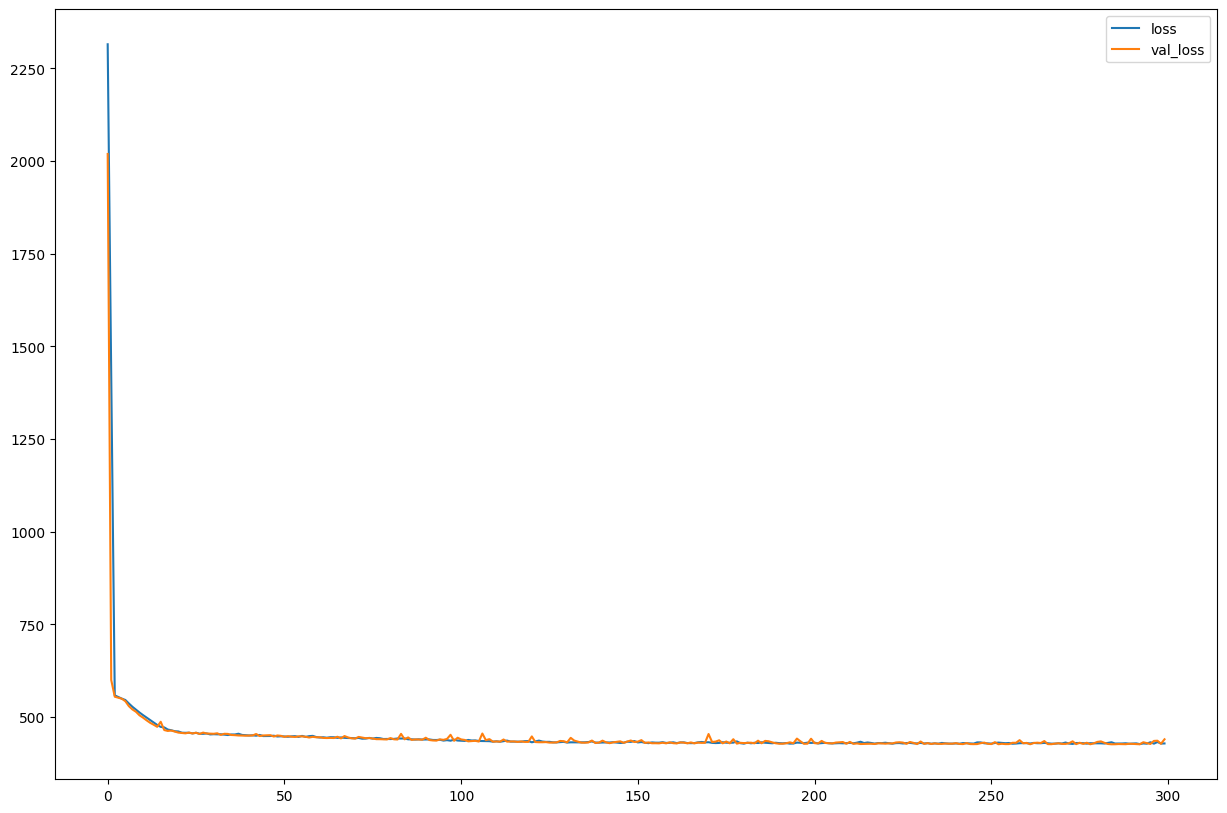

In [7]:
pd.DataFrame(model.history.history).plot(figsize=(15,10))

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions=model.predict(X_test) #here the trained algorithm makes predictions
print("The absolute mean error :",mean_absolute_error(y_test, predictions))
print("The squared mean error :",mean_squared_error(y_test, predictions))
print("The squared mean error :",np.sqrt(mean_squared_error(y_test, predictions)))

140/140 [==============================] - 0s 1ms/step
The absolute mean error : 16.550698852794625
The squared mean error : 439.9531366618911
The squared mean error : 20.97505987266523
